<a href="https://colab.research.google.com/github/davidjcox333/Man-vs-Machine/blob/master/Nashville_ML_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Policing Data'
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Policing Data


In [ ]:
# Read in the data
nash_raw_data = pd.read_csv("tn_nashville_2020_04_01.csv")
nash_data = nash_raw_data.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Sample of what the data looks like and the data types
print(nash_data.dtypes)
nash_data.head()

raw_row_number                     object
date                               object
time                               object
location                           object
lat                               float64
lng                               float64
precinct                           object
reporting_area                    float64
zone                               object
subject_age                       float64
subject_race                       object
subject_sex                        object
officer_id_hash                    object
type                               object
violation                          object
arrest_made                        object
citation_issued                    object
warning_issued                     object
outcome                            object
contraband_found                   object
contraband_drugs                   object
contraband_weapons                 object
frisk_performed                    object
search_conducted                  

,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,232947,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,black,male,80ed1b32eb,vehicular,investigative stop,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,investigative stop,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
1,237161,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,white,male,a983204b21,vehicular,moving traffic violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NaN,False,False,True,NaN,N,False,False,False,False,False,False,False
2,232902,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,white,male,f5d8fbd78b,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
3,233219,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3,8891.0,325,25.0,white,male,4f1d028e45,vehicular,registration,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,registration,TN,NaN,True,False,False,NaN,N,False,False,False,False,False,False,False
4,232780,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,black,male,0f0e6b7d67,vehicular,vehicle equipment violation,False,False,True,warning,False,False,False,False,True,True,True,probable cause,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,True,True,False,False,False,False,False


In [ ]:
# Some functions
def lin_metrics(x, y):
    ''' Prints four common metrics for evaluating regression predictions. '''
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(x, y), 4))
    print('Mean Squared Error:', round(metrics.mean_squared_error(x, y), 4))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(x, y)), 4))
    print('R^2:,', round(r2_score(y_test, y_pred), 4))

def plot_scatter(x, y, xmin=None, xmax=None, ymin=None, ymax=None):
    '''Plots simple scatter plot of two datasets. We'll use to plot scatter of residuals.'''
    matplotlib.rc('figure', figsize=(7, 7))
    plt.scatter(y_test, y_pred, cmap='viridis', alpha=0.2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Observed', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    return plt.show()

def plot_residuals(x, y):
    '''Plot historgram of residuals.'''
    residuals = x - y
    plt.hist(residuals, bins=50, color='black')
    plt.xlabel('Residual')
    plt.ylabel('Num Observations')
    plt.show()


In [ ]:
# Isolate the columns we're interested in. 
df = nash_data[['date', 'time','location','lat','lng','precinct',\
                'reporting_area','zone','subject_age','subject_race',\
                'subject_sex','officer_id_hash','type','violation',
                'arrest_made','citation_issued','warning_issued',\
                'outcome','contraband_found','contraband_drugs',\
                'contraband_weapons','frisk_performed','search_conducted',\
                'search_person','search_vehicle','reason_for_stop',\
                'vehicle_registration_state',]]

In [ ]:
df

,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,reason_for_stop,vehicle_registration_state
0,2010-10-10,NaN,"DOMINICAN DR & ROSA L PARKS BLVD, NASHVILLE, T...",36.187925,-86.798519,6,4403.0,611,27.0,black,male,80ed1b32eb,vehicular,investigative stop,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,investigative stop,TN
1,2010-10-10,10:00:00,"1122 LEBANON PIKE, NASHVILLE, TN, 37210",36.155521,-86.735902,5,9035.0,513,18.0,white,male,a983204b21,vehicular,moving traffic violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,moving traffic violation,TN
2,2010-10-10,10:00:00,"898 DAVIDSON DR, , TN, 37205",36.117420,-86.895593,1,5005.0,121,52.0,white,male,f5d8fbd78b,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,vehicle equipment violation,TN
3,2010-10-10,22:00:00,"MURFREESBORO PIKE & NASHBORO BLVD, ANTIOCH, TN...",36.086799,-86.648581,3,8891.0,325,25.0,white,male,4f1d028e45,vehicular,registration,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,registration,TN
4,2010-10-10,01:00:00,"BUCHANAN ST, NORTH, TN, 37208",36.180038,-86.809109,NaN,NaN,NaN,21.0,black,male,0f0e6b7d67,vehicular,vehicle equipment violation,False,False,True,warning,False,False,False,False,True,True,True,vehicle equipment violation,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092346,2016-09-09,21:54:00,"44TH AVE N & PARK AVE, NASHVILLE, TN, 37209",36.151159,-86.839514,1,5203.0,113,28.0,black,male,e8c7fd5cb4,vehicular,registration,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,registration,TN
3092347,2016-09-09,21:55:00,", , ,",NaN,NaN,NaN,NaN,NaN,17.0,black,male,8563660720,vehicular,moving traffic violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,moving traffic violation,TN
3092348,2016-09-09,09:56:00,"ANNEX AVE & CAPRI DR, NASHVILLE, TN, 37209",36.147129,-86.888211,1,4675.0,123,67.0,white,male,9dadcd316d,vehicular,moving traffic violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,moving traffic violation,TN
3092349,2016-09-09,09:56:00,"DICKERSON PIKE & GATEWOOD AVE, NASHVILLE, TN, ...",36.200178,-86.769899,2,1863.0,223,18.0,hispanic,male,e7099bc91c,vehicular,vehicle equipment violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,vehicle equipment violation,TN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

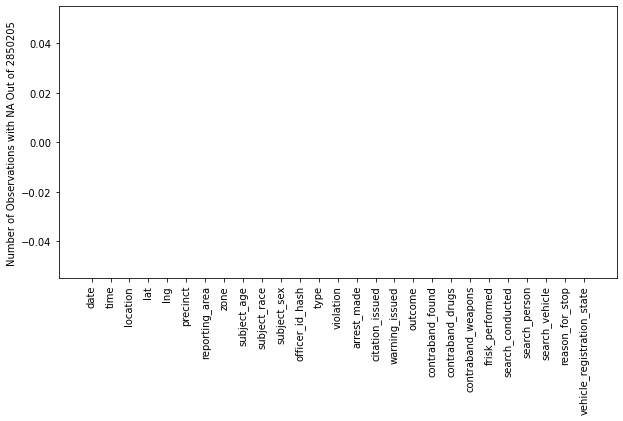

In [ ]:
# Count the number of nan per feature. 
df['contraband_found'] = df['contraband_found'].fillna(0)
df['contraband_drugs'] = df['contraband_drugs'].fillna(0)
df['contraband_weapons'] = df['contraband_weapons'].fillna(0)
df['zone'] = df['zone'].fillna(999)
df['precinct'] = df['precinct'].fillna(999)
df['reporting_area'] = df['reporting_area'].fillna(999)

df = df.dropna()

data_cols = list(df)
col_nan = []
for i in data_cols:
    val = df[i].isna().sum()
    col_nan.append(val)

# Plot the number of nan per feature
height = col_nan
bars = list(df)
y_pos = np.arange(len(bars))

f, ax = plt.subplots(figsize=(10, 5))
plt.bar(y_pos, height, color='grey')
plt.xticks(y_pos, bars, rotation=90) # Rotation of the bars names
plt.ylabel("Number of Observations with NA Out of %s" %len(df))
plt.show() # Show graphic

In [ ]:
# Recode categorical variables as numerical and save the dictionaries
cat_cols = ['location', 'precinct', 'zone', 'subject_race', 'subject_sex', \
            'officer_id_hash', 'type', 'violation', 'reason_for_stop', \
            'vehicle_registration_state']

for i in cat_cols:
  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['date'] = int(df['date'].strftime("%Y%m%d%H%M%S"))

AttributeError: ignored